Implementieren Sie KNN von Hand für nur 2 Dimensionen mit Normalisierung.

Das ist einfach, weil:

funct: Sie normalisieren Ihre Daten in einer anderen Tabelle
funct: Sie codieren eine einfache euklidische Abstandsfunktion
Funktion: Man nimmt einen Punkt und berechnet die Entfernung zu allen Punkten
funct: Du nimmst die Liste von oben und sortierst sie
funct: Sie aggregieren nach Zielvariable
Funktion: Sie nehmen das Maximum, um die Zielklasse zu bestimmen
Du bist fertig!

Hinweis: Dies ist die einzige Möglichkeit, einen maschinellen Lernalgorithmus von Hand zu implementieren und so etwas von Grund auf zu lernen!

In [1]:
# Abhängigkeiten laden.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as m

from sklearn.cluster import KMeans

In [2]:
# Farben definieren, um die Cluster besser zu erkennen.
class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLNE = '\033[4m'
    END = '\033[0m'

In [3]:
def plot_data(data):
    """
    Ploten der Daten, eines zweidimensionalen Arrays.
    Parameters
    ----------
    data: array
        Daten die angezeigt werden sollen.
    """
    plt.figure(figsize=(7.5,6))
    for i in range(len(data)):
        plt.scatter(data[i][0],data[i][1],color='k')

In [4]:
def random_centroid(data,k):
    """
    Zufällige Datenpunkte auswählen, die als Zentrum dienen.
    Parameters
    ----------
    data: array
        Daten aus den die zufälligen Zentren ausgewählt werden.
    k: integer
        Anzahl der zufälligen Zentren.
    
    Returns
    -------
    centroids: array
        Liste der zufälligen Zentren.
    """
    random_idx=[np.random.randint(len(data)) for i in range(k)]
    centroids=[]
    for i in random_idx:
        centroids.append(data[i])
    return centroids

In [5]:
def assign_cluster(data,ini_centroids,k):
    """
    Festlegen der Datenpunkt, zu welchen Cluster sie gehören sollen.
    Parameters
    ----------
    data: array
    ini_centroids: array
        die zufälligen Zentren.
    k: int
        Anzahl der Cluster.
    
    Returns
    -------
    np.asarray: array
        Aufgeteilte Clusterdaten.
    """
    cluster=[]
    for i in range(len(data)):
        euc_dist=[]
        for j in range(k):
            euc_dist.append(np.linalg.norm(np.subtract(data[i],ini_centroids[j])))
        idx=np.argmin(euc_dist)
        cluster.append(idx)
    return np.asarray(cluster)

In [6]:
def compute_centroid(data,clusters,k):
    """
    Datenpunkte für das Cluster neu berechnen.
    Parameters
    ----------
    data: array
        Originaldaten.
    cluster: array
        Bestehendes Cluster.
    k: integer
        Anzahl der Cluster.
    
    Returns
    -------
    np.asarray: array
        Neu berechnetes Cluster.
    """
    centroid = []
    for i in range(k):
        temp_arr=[]
        for j in range(len(data)):
            if clusters[j]==i:
                temp_arr.append(data[j])
        centroid.append(np.mean(temp_arr,axis=0))
    return np.asarray(centroid)

In [7]:
def difference(prev,nxt):
    """
    Berechnet die Distanz zwischen neuem und altem Zentrum.
    Parameters
    ----------
    prev: array
        Daten das altes Zentrums.
    nxt: array
        Daten des neuen Zentrums.
    
    Returns
    -------
    diff: integer
        Distanz zwischen den Punkten.
    """
    diff=0
    for i in range(len(prev)):
        diff+=np.linalg.norm(prev[i]-nxt[i])
    return diff

In [8]:
def show_clusters(data,clusters,centroids,ini_centroids,mark_centroid=True,show_ini_centroid=True,show_plots=True):
    """
    Plotten der Daten.
    Parameter
    ---------
    data: array
        Originale Daten.
    clusters: array
        Liste der Cluster.
    centroids: array
        Liste mit den Zentren.
    ini_centroids: array
        Liste mit den ersten Zentren.
    mark_centroid: boolean
        Soll das Zentrum markiert werden.
    show_ini_centroid: boolean
        Sollen die ersten Zentren angezeigt werden.
    show_plots: boolean
        Soll geplottet werden.
    """
    cols={0:'r',1:'b',2:'g',3:'coral',4:'c',5:'lime'}
    fig,ax=plt.subplots(figsize=(7.5,6));
    for i in range(len(clusters)):
        ax.scatter(data[i][0],data[i][1],color=cols[clusters[i]])
    for j in range(len(centroids)):
        ax.scatter(centroids[j][0],centroids[j][1],marker='*',color=cols[j])
        if show_ini_centroid==True:
            ax.scatter(ini_centroids[j][0],ini_centroids[j][1],marker="+",s=150,color=cols[j])
    if mark_centroid==True:
        for i in range(len(centroids)):
            ax.add_artist(plt.Circle((centroids[i][0],centroids[i][1]),0.4,linewidth=2,fill=False))
            if show_ini_centroid==True:
                ax.add_artist(plt.Circle((ini_centroids[i][0],ini_centroids[i][1]),0.4,linewidth=2,color='y',fill=False))
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    ax.set_title("K-means Cluster")
    if show_plots==True:
        plt.show()

In [9]:
def k_means(data,k,show_type='all',show_plots=True):
    """
    K-Means Algorithmus.
    Parameters
    ----------
    data: array
        Daten die zu Clustern sind.
    k: integer
        Anzahl der Cluster.
    show_type: string
        Angaben welche angezeigt werden sollen.
    show_plots: boolean
        Soll das Plot angezeigt werden.
    
    Returns
    -------
    cluster: array
        Liste mit Clustern.
    c_prev: array
        Liste mit Zentren.
    """
    c_prev=random_centroid(data,k)
    cluster=assign_cluster(data,c_prev,k)
    diff = 100
    ini_centroid = c_prev;
    
    print(color.BOLD+"Notiz:\n + Gelber Kreis: initiale Zentren\n * Schwarzer Kreis: aktuelle Zentren"+color.END)
    
    if show_plots:
        print(color.BOLD+"\n\nInitialer Plot:\n"+color.END)
        show_clusters(data,cluster,c_prev,ini_centroid,show_plots=show_plots)
    while diff>0.0001:
        cluster = assign_cluster(data,c_prev,k)
        if show_type=='all' and show_plots:
            show_clusters(data,cluster,c_prev,ini_centroid,False,False,show_plots=show_plots)
            mark_centroid=False
            show_ini_centroid=False
        c_new = compute_centroid(data,cluster,k)
        diff = difference(c_prev,c_new)
        c_prev=c_new

    if show_plots:
        print(color.BOLD+"\nInitiale Zentren der Cluster:\n"+color.END)
        print(ini_centroid)
        print(color.BOLD+"\nEndgültige Zentren der Cluster:\n"+color.END)
        print(c_prev)
        print(color.BOLD+"\n\nEndgültiger Plot:\n"+color.END) 
        show_clusters(data,cluster,c_prev,ini_centroid,mark_centroid=True,show_ini_centroid=True)    
    return cluster,c_prev

In [10]:
# Laden und Testausgabe der Daten. Diese sind schon bereinigt.
pathname = 'data/test_zahlen_short.csv'
df = pd.read_csv(pathname)
df.head(10)

,Testanzahl,Positivenanteil
0,129291,5.802415
1,374534,6.911522
2,377599,8.776241
3,417646,9.014572
4,383694,8.008204
5,339983,6.683864
6,363659,4.984615
7,327799,3.843819
8,385638,2.640041
9,431682,1.654459


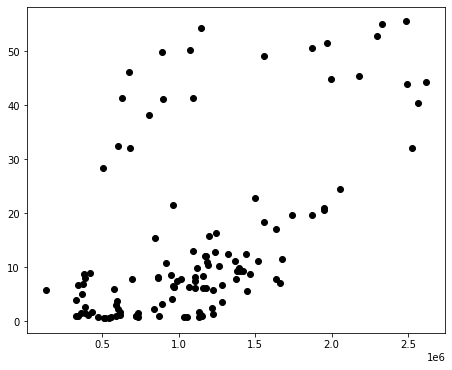

In [11]:
# Umwandeln der DataFrame Daten zu einem Array. Festlegen der Clusteranzahl.
data_arr = df.to_numpy()
k=4
plot_data(data_arr)

Notiz:
 + Gelber Kreis: initiale Zentren
 * Schwarzer Kreis: aktuelle Zentren


Initialer Plot:



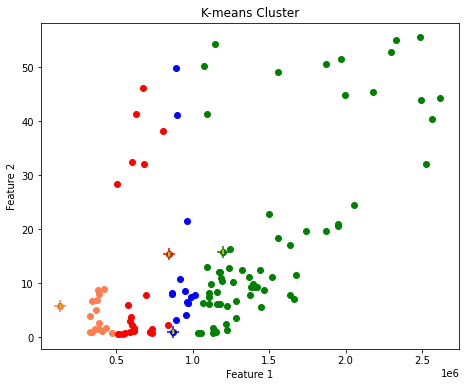


Initiale Zentren der Cluster:

[array([8.45729000e+05, 1.53630773e+01]), array([8.7119100e+05, 9.8084117e-01]), array([1.19768700e+06, 1.57763255e+01]), array([1.29291000e+05, 5.80241471e+00])]

Endgültige Zentren der Cluster:

[[1.05548283e+06 1.24050191e+01]
 [1.46981877e+06 1.27812212e+01]
 [2.21070060e+06 4.01689911e+01]
 [5.08578973e+05 7.54119077e+00]]


Endgültiger Plot:



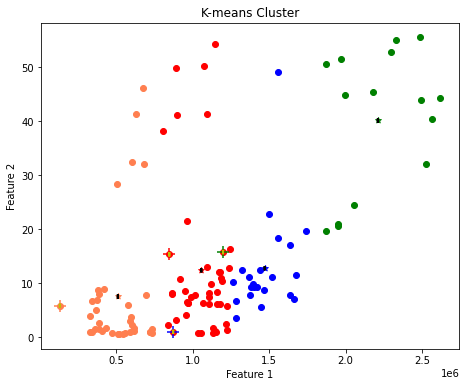

In [12]:
# K-Means Algorithmus ausführen und ausgeben.
cluster,centroid = k_means(data_arr,k,show_type='ini_fin')

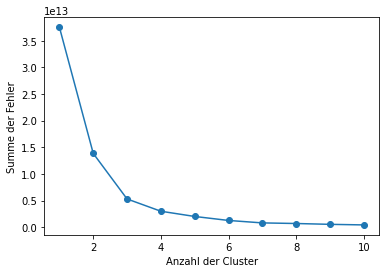

In [13]:
sse = []
k=range(1, 11)
for i in k:
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(data_arr)
    sse.append(km.inertia_)
plt.plot(k, sse, marker='o')
plt.xlabel('Anzahl der Cluster')
plt.ylabel('Summe der Fehler')
plt.show()